In [1]:
from src.utils import Triangle, Vertex
from src.constraints import Simplicial2DConstraint, PDConstraint, CollisionConstraint
from src.solver import ProjectiveDynamicsSolver

import numpy as np
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt

In [2]:
initial_positions = np.array([
    [1.0, 0.0, 0.0],
    [3.0, 0.0, 0.0],
    [1.0, 3.0, 3.0],
    [3.0, 4.0, 4.0],
])
initial_velocities = np.zeros_like(initial_positions)
masses = np.ones(len(initial_positions))
forces = np.zeros_like(initial_positions)

triangles = [
    np.array([0, 1, 2]),
    np.array([0, 1, 3]),
]

In [3]:
rotation = Rotation.from_euler('x', 45, degrees=True)

constraints: list[PDConstraint] = [
    Simplicial2DConstraint(
        triangle_indices=triangles[0],
        initial_positions=rotation.apply(np.array([[0.0, 0.0, 0.0], [0.0, 5.0, 0.0], [0.0, 0.0, 0.5], [0.0, 0.0, 6.0]])),
        weight=1
    ),
    Simplicial2DConstraint(
        triangle_indices=triangles[1],
        initial_positions=rotation.apply(np.array([[0.0, 0.0, 0.0], [0.0, 5.0, 0.0], [0.0, 0.0, 0.5], [0.0, 0.0, 6.0]])),
        weight=1
    ),
    Simplicial2DConstraint(
        triangle_indices=triangles[0],
        initial_positions=rotation.apply(np.array([[0.0, 0.0, 0.0], [0.0, 5.0, 0.0], [0.0, 0.0, 0.5], [0.0, 0.0, 6.0]])),
        weight=1
    ),
    Simplicial2DConstraint(
        triangle_indices=triangles[1],
        initial_positions=rotation.apply(np.array([[0.0, 0.0, 0.0], [0.0, 5.0, 0.0], [0.0, 0.0, 0.5], [0.0, 0.0, 6.0]])),
        weight=1
    ),
    Simplicial2DConstraint(
        triangle_indices=triangles[0],
        initial_positions=rotation.apply(np.array([[0.0, 0.0, 0.0], [0.0, 5.0, 0.0], [0.0, 0.0, 0.5], [0.0, 0.0, 6.0]])),
        weight=1
    ),
    Simplicial2DConstraint(
        triangle_indices=triangles[1],
        initial_positions=rotation.apply(np.array([[0.0, 0.0, 0.0], [0.0, 5.0, 0.0], [0.0, 0.0, 0.5], [0.0, 0.0, 6.0]])),
        weight=1
    ),
    Simplicial2DConstraint(
        triangle_indices=triangles[0],
        initial_positions=rotation.apply(np.array([[0.0, 0.0, 0.0], [0.0, 5.0, 0.0], [0.0, 0.0, 0.5], [0.0, 0.0, 6.0]])),
        weight=1
    ),
    Simplicial2DConstraint(
        triangle_indices=triangles[1],
        initial_positions=rotation.apply(np.array([[0.0, 0.0, 0.0], [0.0, 5.0, 0.0], [0.0, 0.0, 0.5], [0.0, 0.0, 6.0]])),
        weight=1
    ),
]

In [4]:
solver = ProjectiveDynamicsSolver(
    initial_positions,
    initial_velocities,
    masses,
    forces,
    constraints,
    0.1
)

In [5]:
solver.q, solver.v

(array([[1., 0., 0.],
        [3., 0., 0.],
        [1., 3., 3.],
        [3., 4., 4.]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]))

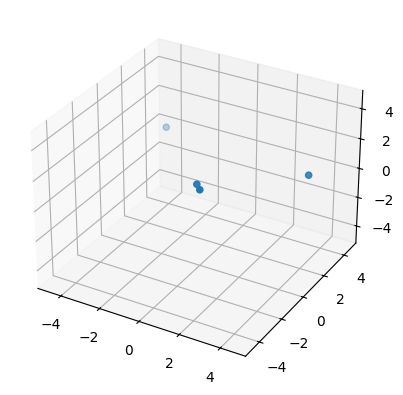

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim3d(-5, 5)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-5, 5)
ax.scatter(constraints[0].initial_positions[:, 1], constraints[0].initial_positions[:, 2], marker="o")

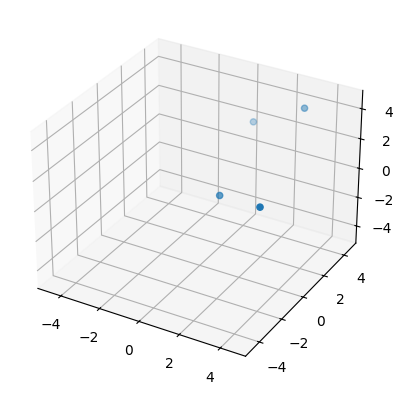

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim3d(-5, 5)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-5, 5)
ax.scatter(solver.q[:, 0], solver.q[:, 1], solver.q[:, 2], marker="o")

In [8]:
for _ in range(200):
    solver.perform_step(200)

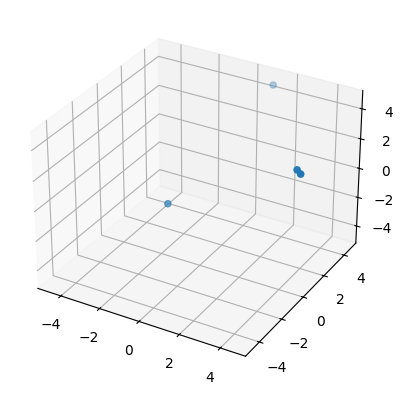

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim3d(-5, 5)
ax.set_ylim3d(-5, 5)
ax.set_zlim3d(-5, 5)
ax.scatter(solver.q[:, 0], solver.q[:, 1], solver.q[:, 2], marker="o")

In [66]:
import scipy as sp
sp.spatial.distance.pdist(constraints[0].initial_positions)

array([5.        , 0.5       , 6.        , 5.02493781, 7.81024968,
       5.5       ])

In [67]:
sp.spatial.distance.pdist(solver.q)

array([2.        , 4.24264069, 6.        , 4.69041576, 5.65685425,
       2.44948974])

In [29]:
initial_positions = np.array([[0.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.1, 0.1, 0.0]])
initial_velocities = np.ones_like(initial_positions)
masses = np.ones(initial_positions.shape[0])
external_forces = np.zeros_like(initial_positions)

In [30]:
constraints: list[PDConstraint] = [
    Simplicial2DConstraint(
        weight=1,
        triangle_indices=np.array([0, 1, 2]),
        initial_positions=initial_positions,
    ),
    CollisionConstraint(
        weight=1,
        penetrating_vertex_index=3,
        projected_vertex_positions=np.array([1, 0.5, -0.5]),
        num_vertices=4,
    )
]

In [31]:
constraints[1].A.shape, constraints[0].A.shape

((1, 1), (2, 3))

In [32]:
constraints[1].S.shape, constraints[0].S.shape

((1, 4), (3, 4))

In [33]:
solver = ProjectiveDynamicsSolver(
    initial_positions,
    initial_velocities,
    masses,
    external_forces,
    constraints
)

In [34]:
solver.q

array([[0. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0.1, 0.1, 0. ]])

In [35]:
h = []

for _ in range(1000):
    solver.perform_step(100)
    h.append(solver.q[3, 2])

In [36]:
np.round(solver.q, 3)

array([[100.   , 100.   , 100.   ],
       [101.   , 100.   , 100.   ],
       [100.   , 101.   , 100.   ],
       [  0.991,   0.493,  -0.503]])

In [38]:
np.round(solver.v, 3)

array([[ 1.   ,  1.   ,  1.   ],
       [ 1.   ,  1.   ,  1.   ],
       [ 1.   ,  1.   ,  1.   ],
       [-0.   ,  0.002,  0.007]])

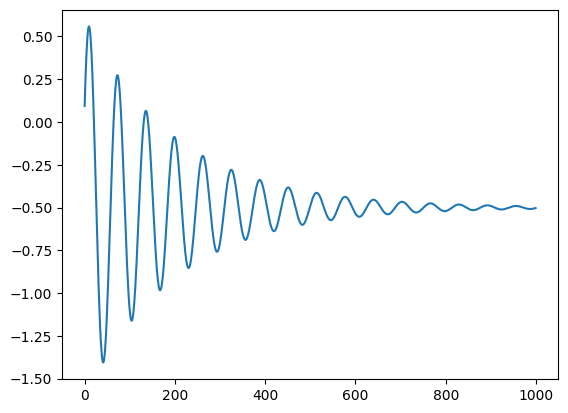

In [37]:
plt.plot(h)

In [23]:
h

[0.10396039603960396,
 0.11180276443485931,
 0.12341102260407394,
 0.13863295126068176,
 0.1572820593240491,
 0.17913976969051132,
 0.20395790104650846,
 0.23146141822030256,
 0.26135142118227395,
 0.29330834073687656,
 0.32699530721928627,
 0.362061657130392,
 0.3981465416252453,
 0.43488260011890956,
 0.4718996619926473,
 0.5088284394716683,
 0.5453041751987023,
 0.5809702088373627,
 0.6154814281940822,
 0.648507571832477,
 0.6797363519513582,
 0.7088763683863756,
 0.7356597869518742,
 0.7598447579379928,
 0.7812175533902094,
 0.7995944047944812,
 0.8148230259393594,
 0.8267838089942947,
 0.8353906851972575,
 0.8405916449507131,
 0.842368915548682,
 0.8407387981650007,
 0.8357511690904154,
 0.8274886534810199,
 0.8160654830412122,
 0.8016260520805986,
 0.784343189227708,
 0.764416164727542,
 0.7420684556706694,
 0.7175452936770264,
 0.6911110214686964,
 0.6630462863964025,
 0.6336451003208996,
 0.6032117962825709,
 0.5720579131131112,
 0.5404990395481697,
 0.5088516494883448,
 0.4774

In [22]:
constraints[0].S, constraints[0].A

(array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.]]),
 array([[ 1,  0, -1],
        [ 0,  1, -1]]))

In [23]:
constraints[0].A @ constraints[0].S

array([[ 1.,  0., -1.,  0.],
       [ 0.,  1., -1.,  0.]])